<a href="https://colab.research.google.com/github/namozhdehi/Pneumonia/blob/main/04_Pre_Processing_Pneumonia_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 Pre-Processing<a id='4_PreProcessing'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 PreProcessing](#4_PreProcessing)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Data Loading and Setup](#4.4_Data_Loading)
  * [4.5 Image Transformations](#4.5_Transformations)
  * [4.6 Data Augmentation](#4.6_Augmentation)
  * [4.7 Train/Validation/Test Splitting](#4.7_Splitting)
  * [4.8 DataLoader Creation](#4.8_DataLoader)
  * [4.9 Removing Duplicates](#4.9_Remove_Duplicates)
  * [4.10 Display Sample Batch](#4.10_Batch)
  * [4.11 Save Processed Data](#4.11_Save)

## 4.2 Introduction<a id='4.2_Introduction'></a>

In this notebook, we will preprocess the chest X-ray dataset for pneumonia detection using TensorFlow and Keras. This involves loading the images, applying image transformations, splitting the dataset into training, validation, and test sets, and finally creating TensorFlow data pipelines to feed the images into the model during training. These preprocessing steps are crucial for training a deep learning model efficiently and ensuring that the data is ready for input.

## 4.3 Imports<a id='4.3_Imports'></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, UnidentifiedImageError

## 4.4 Data Loading and Setup<a id='4.4_Data_Loading'></a>

In [2]:
# Directory where the images are stored
data_dir = 'Data/chest_xray'

# Load CSV files from the EDA step
train_df = pd.read_csv('pneumonia_EDA_train.csv')
val_df = pd.read_csv('pneumonia_EDA_val.csv')
test_df = pd.read_csv('pneumonia_EDA_test.csv')

# Print the size of datasets
print(f"Training Set: {train_df.shape}")
print(f"Validation Set: {val_df.shape}")
print(f"Test Set: {test_df.shape}")

Training Set: (4172, 3)
Validation Set: (1044, 3)
Test Set: (624, 3)


## 4.4.1 Setup Kaggle API<a id='2.5_Kaggle'></a>

This code sets up the Kaggle API credentials to download the "chest-xray-pneumonia" dataset from Kaggle, unzips the dataset into a folder named "Data/chest_xray," and checks if the directory exists, raising an error if it doesn't.

In [3]:
'''
# Set up Kaggle API credentials
os.environ['KAGGLE_CONFIG_DIR'] = "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/kaggle.json"  # Update this path

# Download the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzip the downloaded file
import zipfile

with zipfile.ZipFile('chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('Data')  # Extract to a folder named 'chest_xray'

# Define the data directory where the dataset is extracted
data_dir = 'Data/chest_xray'


# Check if data_dir exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The dataset directory '{data_dir}' does not exist. Please check the path.")
    '''

'\n# Set up Kaggle API credentials\nos.environ[\'KAGGLE_CONFIG_DIR\'] = "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/kaggle.json"  # Update this path\n\n# Download the dataset\n!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia\n\n# Unzip the downloaded file\nimport zipfile\n\nwith zipfile.ZipFile(\'chest-xray-pneumonia.zip\', \'r\') as zip_ref:\n    zip_ref.extractall(\'Data\')  # Extract to a folder named \'chest_xray\'\n\n# Define the data directory where the dataset is extracted\ndata_dir = \'Data/chest_xray\'\n\n\n# Check if data_dir exists\nif not os.path.exists(data_dir):\n    raise FileNotFoundError(f"The dataset directory \'{data_dir}\' does not exist. Please check the path.")\n    '

## 4.5 Image Transformations<a id='4.5_Transformations'></a>

Define the transformations we will apply to the images, such as resizing, rescaling, and augmentation.

In [4]:
# Define data rescaling and resizing for all datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

## 4.6 Data Augmentation<a id='4.6_Augmentation'></a>

For the training dataset, we will apply data augmentation techniques to artificially increase the size of the dataset and improve the model's ability to generalize.

In [5]:
# Convert numerical labels to string format
train_df['label'] = train_df['label'].apply(lambda x: 'Normal' if x == 0 else 'Pneumonia')
val_df['label'] = val_df['label'].apply(lambda x: 'Normal' if x == 0 else 'Pneumonia')
test_df['label'] = test_df['label'].apply(lambda x: 'Normal' if x == 0 else 'Pneumonia')

# Data Augmentation for Training Data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,  # Set directory to None to use paths in the dataframe
    x_col="image_path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Found 4172 validated image filenames belonging to 2 classes.


## 4.7 Train/Validation/Test Splitting<a id='4.7_Splitting'></a>

Since the data is already divided into train, validation, and test sets, we will create TensorFlow datasets using ImageDataGenerator.

In [6]:
# Validation and Test Data Loaders
val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col="image_path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col="image_path",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


## 4.8 DataLoader Creation<a id='4.8_DataLoader'></a>

Create DataLoader objects (i.e., ImageDataGenerator in TensorFlow/Keras) to efficiently load batches of data during training.

In [7]:
# Print the sizes of the datasets
print(f"Training Batches: {len(train_generator)}")
print(f"Validation Batches: {len(val_generator)}")
print(f"Test Batches: {len(test_generator)}")

Training Batches: 131
Validation Batches: 33
Test Batches: 20


## 4.9 Removing Duplicates<a id='4.9_Remove_Duplicates'></a>

Since duplicate images can skew model training, let’s remove any duplicate images found based on file content.

In [8]:
def remove_duplicates(df):
    image_hashes = {}
    duplicates = []

    for img_path in df['image_path']:
        try:
            with Image.open(img_path) as img:
                img_hash = hash(img.tobytes())  # Hash the image content
                if img_hash in image_hashes:
                    duplicates.append(img_path)  # Save duplicate paths
                else:
                    image_hashes[img_hash] = img_path
        except FileNotFoundError:
            print(f"File not found: {img_path}")
        except UnidentifiedImageError:
            print(f"Corrupted image found: {img_path}")

    # Drop duplicates from the DataFrame
    df = df[~df['image_path'].isin(duplicates)]
    print(f"Removed {len(duplicates)} duplicates.")
    return df

# Remove duplicates from train, val, and test sets
train_df = remove_duplicates(train_df)
val_df = remove_duplicates(val_df)
test_df = remove_duplicates(test_df)

Removed 16 duplicates.
Removed 1 duplicates.
Removed 6 duplicates.


## 4.10 Display Sample Batch<a id='4.10_Batch'></a>

Batch shape (images): (32, 224, 224, 3)
Batch shape (labels): (32,)


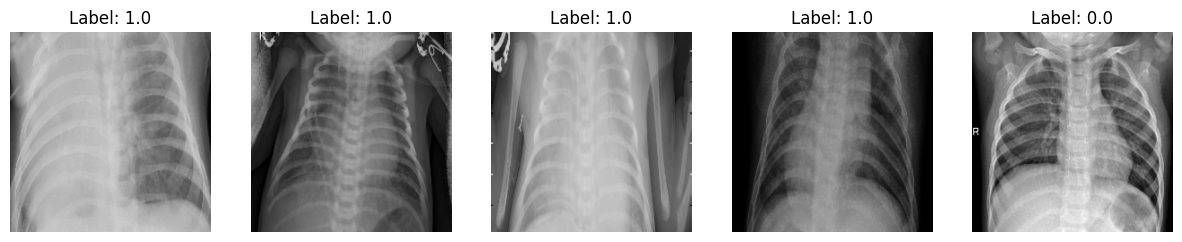

In [9]:
def show_images(generator):
    # Get the first batch of images
    images, labels = next(generator)

    # Print the shape of the batch to confirm data is loaded
    print(f"Batch shape (images): {images.shape}")
    print(f"Batch shape (labels): {labels.shape}")

    # Check if images array is not empty
    if images.shape[0] > 0:
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        for i in range(min(5, images.shape[0])):  # Ensure we don't go out of bounds
            img = images[i]
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(f'Label: {labels[i]}')
        plt.show()
    else:
        print("No images in batch to display")

# Show a batch of training images
show_images(train_generator)

## 4.11 Save Processed Data<a id='4.11_Save'></a>

In [10]:
# Save relevant configuration parameters for recreating the generator
generator_config = {
    'batch_size': train_generator.batch_size,
    'class_mode': train_generator.class_mode,
    'target_size': train_generator.target_size,
    'shuffle': train_generator.shuffle,
    'seed': train_generator.seed,
}

import json
with open('train_generator_config.json', 'w') as f:
    json.dump(generator_config, f)

print("Generator configuration saved!")

Generator configuration saved!


## 4.11 Summary<a id='4.10_Summary'></a>

In this notebook, we preprocessed the chest X-ray dataset for pneumonia detection using TensorFlow/Keras. We loaded the data, applied transformations such as resizing, rescaling, and data augmentation to enhance model generalization. We also removed duplicate images to avoid skewing the training process. After splitting the data into training, validation, and test sets, we created ImageDataGenerator objects to efficiently feed batches during model training. Finally, we saved the preprocessed generators for future use.